# 夹具分析
## 夹具介绍
FTDevice设计生产的，用于测试模拟IC芯片的夹具，包含PCB板和IC socket。

## 测试结果分析

In [32]:
import skrf as rf
from matplotlib import pyplot as plt
import numpy as np

rf.stylely()

夹具，未连接socket时，测试结果为 wo_socket_afr_off.s4p。VNA经过4端口校准，然后对未连接socket夹具测试。4个端口分别对应于PCB板的RF1，RF2，RF3，RF4。

可以看到，夹具的反射特性，基本上在10GHz~15GHz均发生了谐振，可以判断夹具的可用频段低于10GHz。

Text(0.5, 1.0, 'fixture port reflection, without socket')

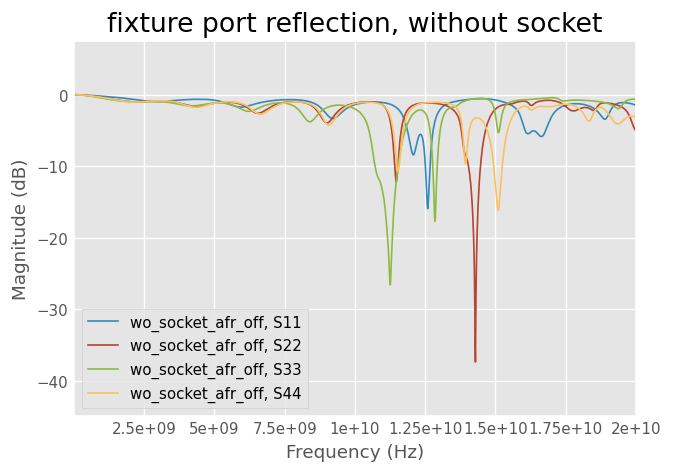

In [33]:
spara = rf.Network('20220930-2/wo_socket_afr_off.s4p')
spara.plot_s_db(m=0,n=0)
spara.plot_s_db(m=1,n=1)
spara.plot_s_db(m=2,n=2)
spara.plot_s_db(m=3,n=3)
plt.title('fixture port reflection, without socket')

不带socket时，用AFR功能时，对端口1，2，3，4，open状态，分别进行测试，测试后的结果为wo_socket_afr_saveallmeas_stdA1Open.s1p，wo_socket_afr_saveallmeas_stdA2Open.s1p，wo_socket_afr_saveallmeas_stdB1Open.s1p,wo_socket_afr_saveallmeas_stdB2Open.s1p

AFR对端口的映射为，1-A1，2-B1，3-A2，4-B2

可以看到，wo_socket_afr_saveallmeas_stdA1Open.s1p与校准后测试的s4p中的s11，是完全吻合的，差异在-50dB以下，这个差异仅仅是两次相同测试的重复性差异。

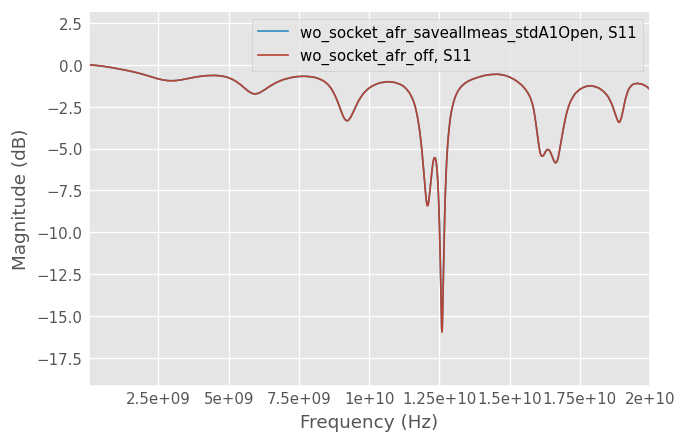

In [34]:
spara2 = rf.Network('20220930-2/wo_socket_afr_saveallmeas_stdA1Open.s1p')
spara2.plot_s_db(m=0,n=0)
spara.plot_s_db(m=0,n=0)
diff = spara2.s11- spara.s11

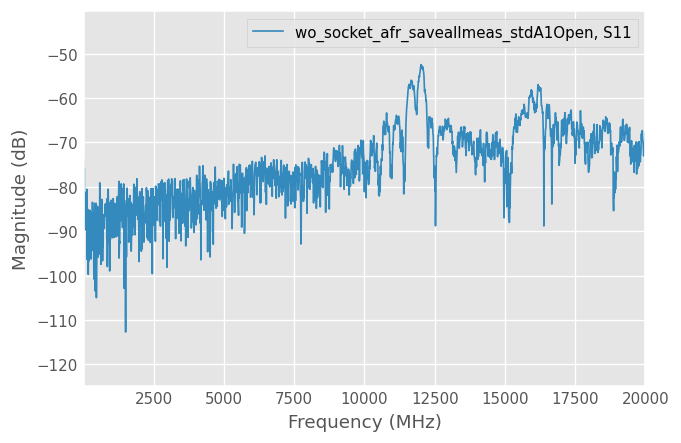

In [35]:
diff.plot_s_db(m=0,n=0)

AFR提取的夹具参数，不含socket时，端口1对应A1

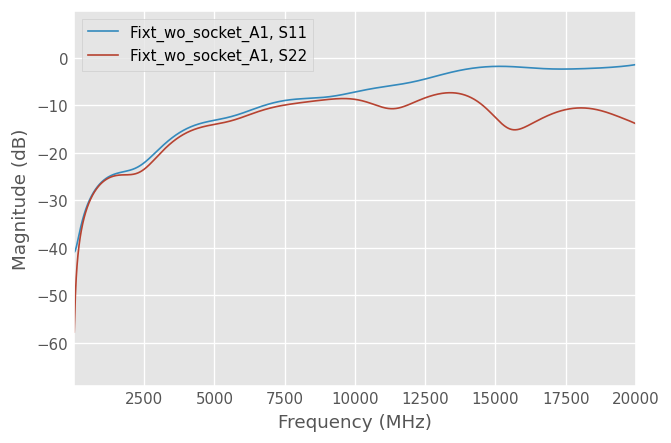

In [36]:
spara3 = rf.Network('20220930-2/Fixt_wo_socket_A1.s2p')
spara3.plot_s_db(m=0,n=0)
spara3.plot_s_db(m=1,n=1)

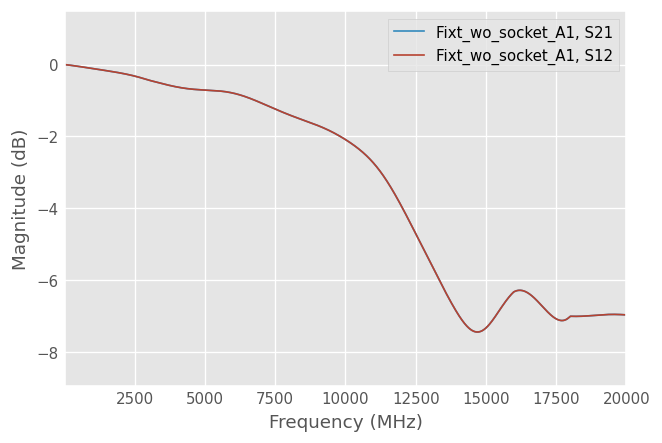

In [37]:
spara3.plot_s_db(m=1,n=0)
spara3.plot_s_db(m=0,n=1)

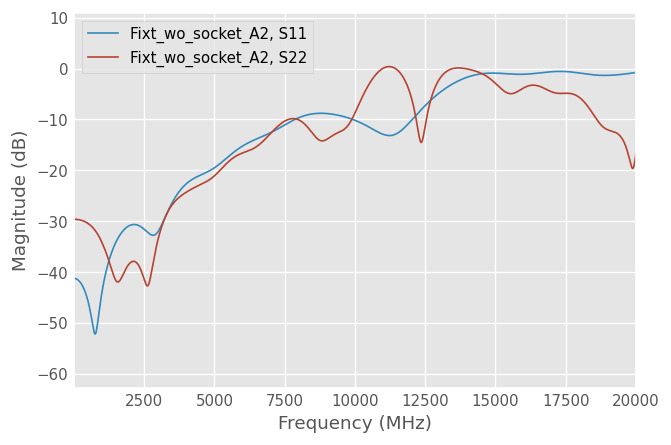

In [38]:
spara3 = rf.Network('20220930-2/Fixt_wo_socket_A2.s2p')
spara3.plot_s_db(m=0,n=0)
spara3.plot_s_db(m=1,n=1)

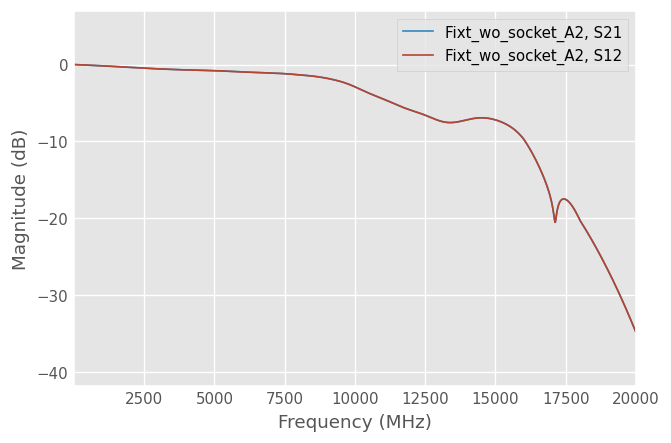

In [39]:
spara3.plot_s_db(m=1,n=0)
spara3.plot_s_db(m=0,n=1)

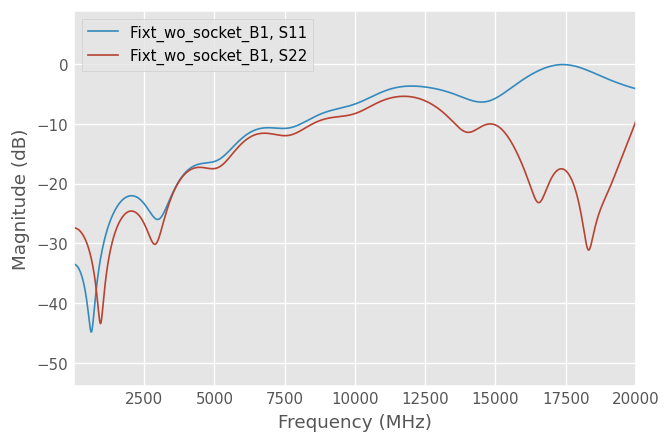

In [40]:
spara3 = rf.Network('20220930-2/Fixt_wo_socket_B1.s2p')
spara3.plot_s_db(m=0,n=0)
spara3.plot_s_db(m=1,n=1)

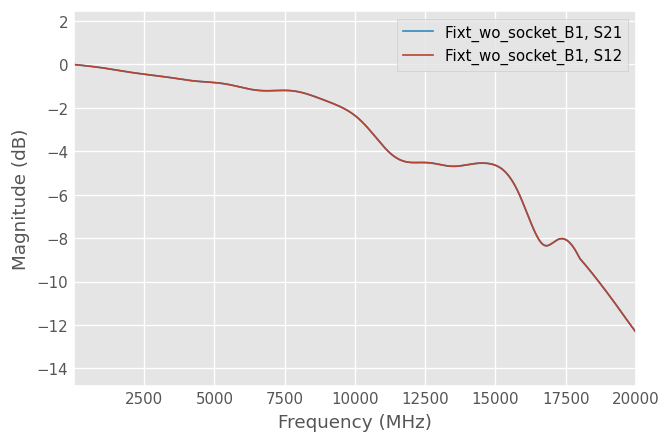

In [41]:
spara3.plot_s_db(m=1,n=0)
spara3.plot_s_db(m=0,n=1)

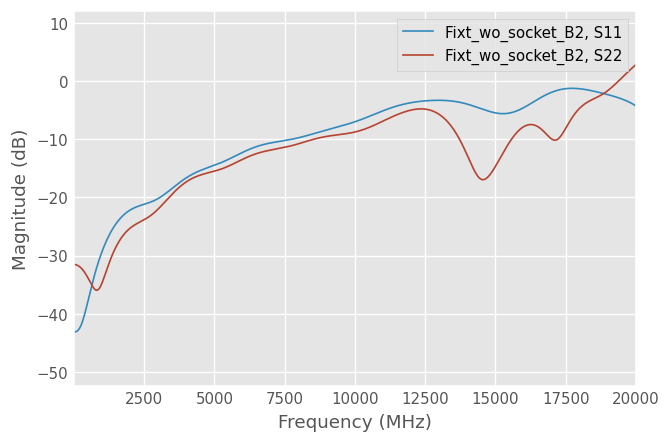

In [42]:
spara3 = rf.Network('20220930-2/Fixt_wo_socket_B2.s2p')
spara3.plot_s_db(m=0,n=0)
spara3.plot_s_db(m=1,n=1)

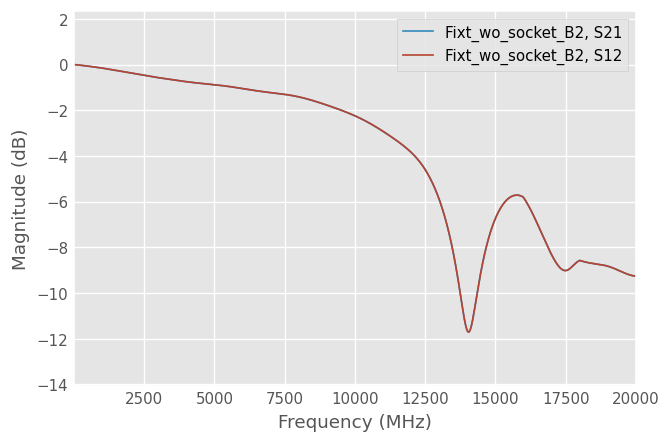

In [43]:
spara3.plot_s_db(m=1,n=0)
spara3.plot_s_db(m=0,n=1)

AFR提取的夹具参数，含socket与不含的对比，端口1对应A1

可以看到，含有socket后，插损增加。反射在SMA口没有明显变化，而在socket口有明显变化。

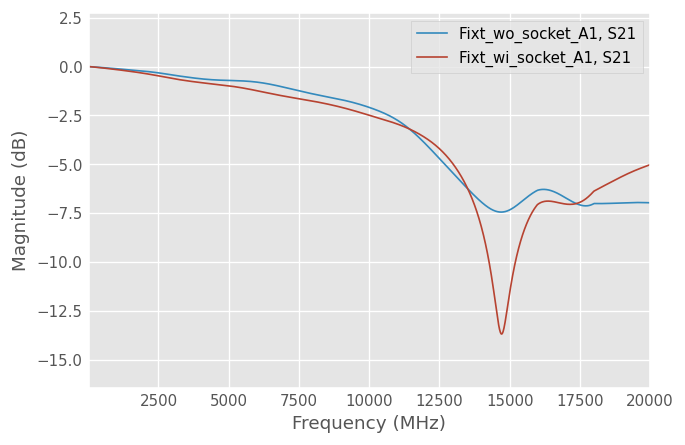

In [44]:
spara3 = rf.Network('20220930-2/Fixt_wo_socket_A1.s2p')
spara4 = rf.Network('20220930-2/Fixt_wi_socket_A1.s2p')

spara3.plot_s_db(m=1,n=0)
spara4.plot_s_db(m=1,n=0)

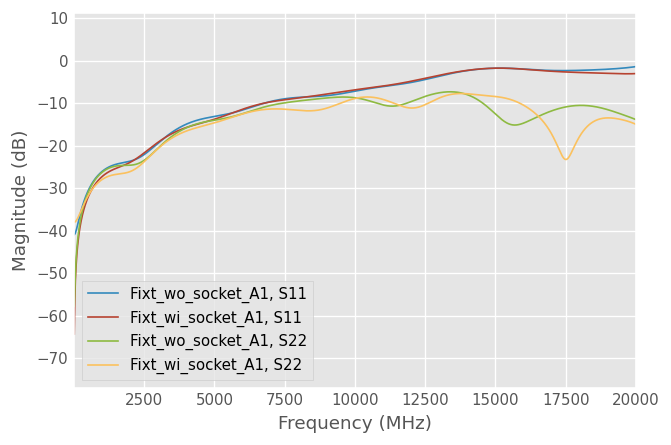

In [45]:
spara3.plot_s_db(m=0,n=0)
spara4.plot_s_db(m=0,n=0)
spara3.plot_s_db(m=1,n=1)
spara4.plot_s_db(m=1,n=1)

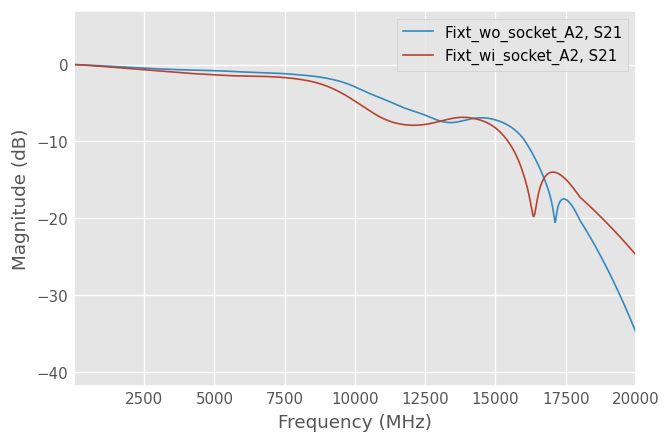

In [46]:
spara3 = rf.Network('20220930-2/Fixt_wo_socket_A2.s2p')
spara4 = rf.Network('20220930-2/Fixt_wi_socket_A2.s2p')

spara3.plot_s_db(m=1,n=0)
spara4.plot_s_db(m=1,n=0)

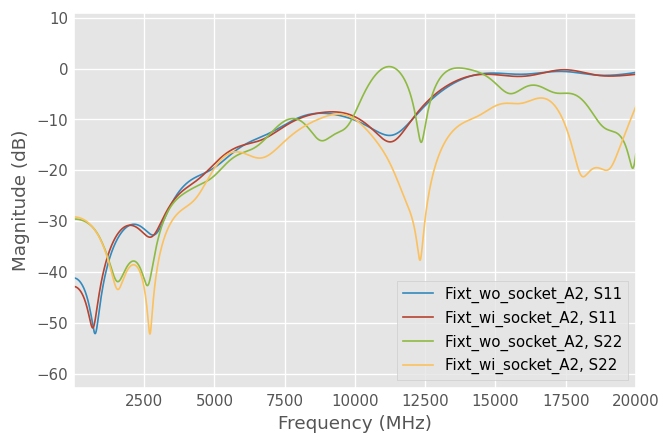

In [47]:
spara3.plot_s_db(m=0,n=0)
spara4.plot_s_db(m=0,n=0)
spara3.plot_s_db(m=1,n=1)
spara4.plot_s_db(m=1,n=1)

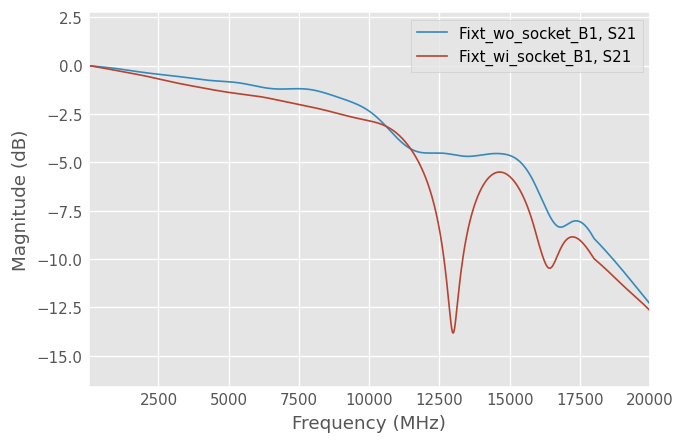

In [48]:
spara3 = rf.Network('20220930-2/Fixt_wo_socket_B1.s2p')
spara4 = rf.Network('20220930-2/Fixt_wi_socket_B1.s2p')

spara3.plot_s_db(m=1,n=0)
spara4.plot_s_db(m=1,n=0)

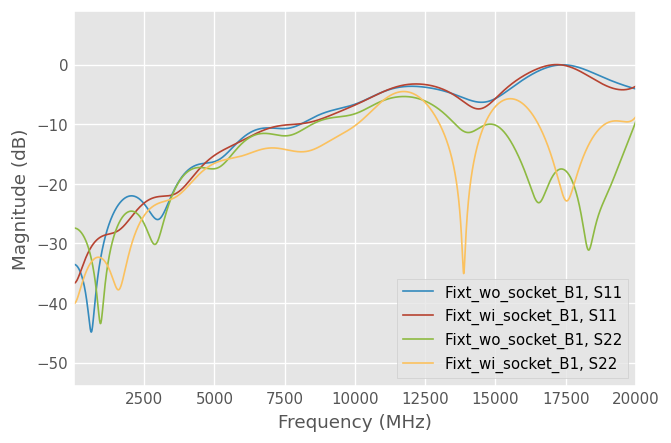

In [49]:
spara3.plot_s_db(m=0,n=0)
spara4.plot_s_db(m=0,n=0)
spara3.plot_s_db(m=1,n=1)
spara4.plot_s_db(m=1,n=1)

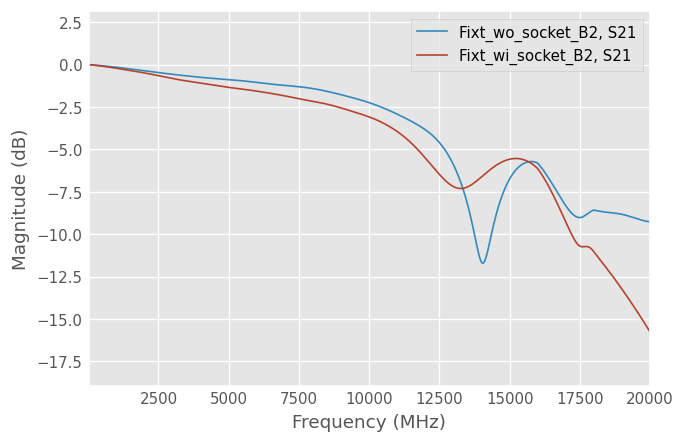

In [50]:
spara3 = rf.Network('20220930-2/Fixt_wo_socket_B2.s2p')
spara4 = rf.Network('20220930-2/Fixt_wi_socket_B2.s2p')

spara3.plot_s_db(m=1,n=0)
spara4.plot_s_db(m=1,n=0)

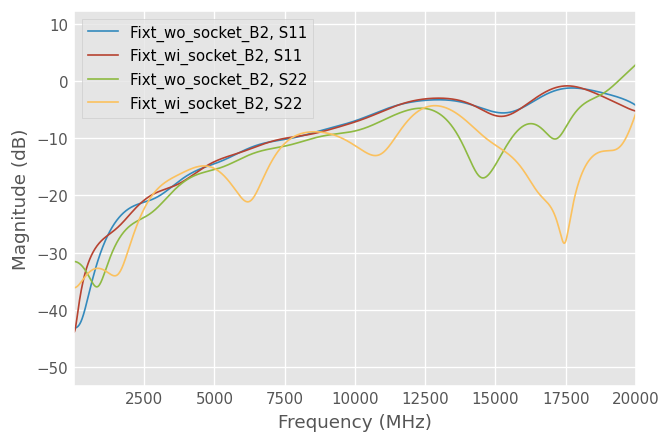

In [51]:
spara3.plot_s_db(m=0,n=0)
spara4.plot_s_db(m=0,n=0)
spara3.plot_s_db(m=1,n=1)
spara4.plot_s_db(m=1,n=1)

## 验证AFR on/off

AFR off就是AFR on级联计算出来的夹具s2p。

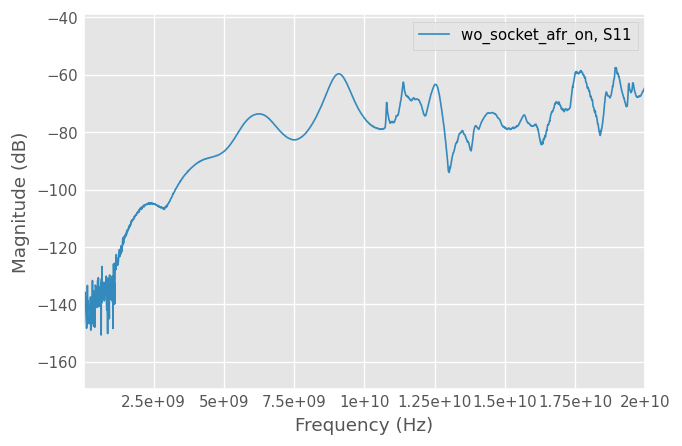

In [59]:
afr_on = rf.Network('20220930-2/wo_socket_afr_on.s4p')
afr_off = rf.Network('20220930-2/wo_socket_afr_off.s4p')
A1 = rf.Network('20220930-2/Fixt_wo_socket_A1.s2p')
A2 = rf.Network('20220930-2/Fixt_wo_socket_A2.s2p')
B1 = rf.Network('20220930-2/Fixt_wo_socket_B1.s2p')
B2 = rf.Network('20220930-2/Fixt_wo_socket_B2.s2p')

temp = rf.connect(afr_on,0,A1,1)
# temp = rf.connect(temp,1,B1,0)
# temp = rf.connect(temp,2,A2,0)
# temp = rf.connect(temp,3,B2,0)

diff = temp-afr_off
diff.plot_s_db(m=0,n=0)

AFR ON就是用 de-embed 去掉计算出来的夹具。这里验证了已知一个网络的s2p，和一个包含此网络的Snp，通过级联s2p inverse网络的方式，完成去嵌入。

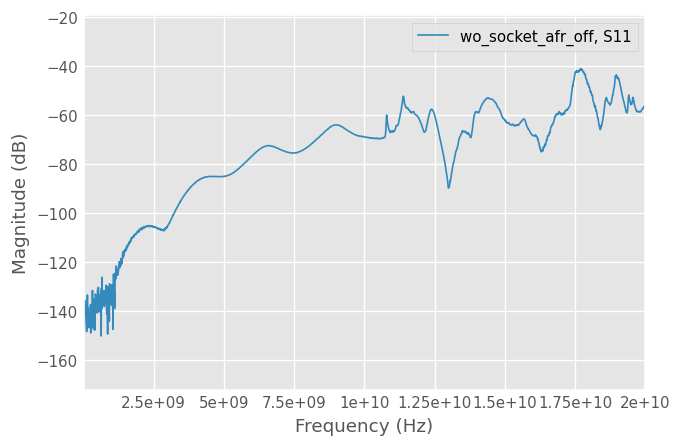

In [62]:
temp = rf.connect(afr_off,0,A1.inv,1)
diff = temp-afr_on
diff.plot_s_db(m=0,n=0)

## AFR与de-embedding方法的比对
未完成，根据scikit-rf工具包文档说明，这个de-embedding算法有严格的假设条件。https://scikit-rf.readthedocs.io/en/latest/tutorials/Deembedding.html

AFR提取的夹具参数，与scikit-rf工具包中的de-embedding方法（仅用open）进行对比

In [ ]:
open_cal = rf.Network('20220930-2/wo_socket_afr_saveallmeas_stdA1Open.s1p')